# Google Play Store data exploration
### Kamila Bobkowska s444517

Link do danych: https://www.kaggle.com/datasets/lava18/google-play-store-apps

Aby ściągnąć dataset z Kaggle należy założyć konto i pobrać token który umożliwi poprawne korzystanie API. Po pobraniu tokenu trzeba go umieścić w odpowiednim miejscu w zależności czy korzystamy z Winodwsa czy Linuxa jest to inna lokalizacja.

*Robiąc to zadanie pobrałam dane korzystając z kaggle z Windowsem, ponieważ nie mam dostępu do Linuxa oprócz komputera wydziałowego, a tam nie działają mi komendy z biblioteki kaggle.*

In [45]:
!kaggle datasets download -d lava18/google-play-store-apps

google-play-store-apps.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip -o google-play-store-apps.zip

Archive:  google-play-store-apps.zip
  inflating: googleplaystore.csv     
  inflating: googleplaystore_user_reviews.csv  
  inflating: license.txt             


In [47]:
import pandas as pd

data = pd.read_csv('googleplaystore.csv')
data

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
0         4.1     159                 19M      10,000+  Free     0   
1         3.9     967                 14M     500,000+  Free     0   
2         4.7   87510                8.7M   5,000,000+  Free     0   
3         4.5  215644                 25M  50,000,000+  Free     0   
4         4.3     967                2.8M     100,000+  Free     0   
...       ...     ...                 ...          ...   ...   ...   
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres      Last Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10836       Everyone                  Education     July 25, 2017   
10837       Everyone                  Education      July 6, 2018   
10838       Everyone                    Medical  January 20, 2017   
10839     Mature 17+          Books & Reference  January 19, 2015   
10840       Everyone                  Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[10841 rows x 13 columns]

## Data exploration

In [48]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [49]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [50]:
data.describe(include='all')

App Category       Rating Reviews                Size    Installs  \
count    10841    10841  9367.000000   10841               10841       10841   
unique    9660       34          NaN    6002                 462          22   
top     ROBLOX   FAMILY          NaN       0  Varies with device  1,000,000+   
freq         9     1972          NaN     596                1695        1579   
mean       NaN      NaN     4.193338     NaN                 NaN         NaN   
std        NaN      NaN     0.537431     NaN                 NaN         NaN   
min        NaN      NaN     1.000000     NaN                 NaN         NaN   
25%        NaN      NaN     4.000000     NaN                 NaN         NaN   
50%        NaN      NaN     4.300000     NaN                 NaN         NaN   
75%        NaN      NaN     4.500000     NaN                 NaN         NaN   
max        NaN      NaN    19.000000     NaN                 NaN         NaN   

         Type  Price Content Rating Genres    Last Updated  \
count   10840  10841          10840  10841           10841   
unique      3     93              6    120            1378   
top      Free      0       Everyone  Tools  August 3, 2018   
freq    10039  10040           8714    842             326   
mean      NaN    NaN            NaN    NaN             NaN   
std       NaN    NaN            NaN    NaN             NaN   
min       NaN    NaN            NaN    NaN             NaN   
25%       NaN    NaN            NaN    NaN             NaN   
50%       NaN    NaN            NaN    NaN             NaN   
75%       NaN    NaN            NaN    NaN             NaN   
max       NaN    NaN            NaN    NaN             NaN   

               Current Ver Android Ver  
count                10833       10838  
unique                2832          33  
top     Varies with device  4.1 and up  
freq                  1459        2451  
mean                   NaN         NaN  
std                    NaN         NaN  
min                    NaN         NaN  
25%                    NaN         NaN  
50%                    NaN         NaN  
75%                    NaN         NaN  
max                    NaN         NaN

In [51]:
data['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [52]:
data["Content Rating"].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [53]:
data['Genres'].value_counts()

Tools                                842
Entertainment                        623
Education                            549
Medical                              463
Business                             460
                                    ... 
Parenting;Brain Games                  1
Health & Fitness;Education             1
Role Playing;Education                 1
Puzzle;Education                       1
Travel & Local;Action & Adventure      1
Name: Genres, Length: 120, dtype: int64

In [54]:
data['Price'].value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$3.02         1
$2.95         1
$1.61         1
$14.00        1
$1.29         1
Name: Price, Length: 93, dtype: int64

In [55]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [56]:
data.dropna(subset=['Rating', 'Type','Content Rating','Current Ver','Android Ver'], inplace=True)
data.reset_index(drop=True, inplace=True)
data

App             Category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                   Coloring book moana       ART_AND_DESIGN   
2     U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                 Sketch - Draw & Paint       ART_AND_DESIGN   
4                 Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                 ...                  ...   
9355                                      FR Calculator               FAMILY   
9356                                   Sya9a Maroc - FR               FAMILY   
9357                   Fr. Mike Schmitz Audio Teachings               FAMILY   
9358                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
9359      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

      Rating Reviews                Size     Installs  Type Price  \
0        4.1     159                 19M      10,000+  Free     0   
1        3.9     967                 14M     500,000+  Free     0   
2        4.7   87510                8.7M   5,000,000+  Free     0   
3        4.5  215644                 25M  50,000,000+  Free     0   
4        4.3     967                2.8M     100,000+  Free     0   
...      ...     ...                 ...          ...   ...   ...   
9355     4.0       7                2.6M         500+  Free     0   
9356     4.5      38                 53M       5,000+  Free     0   
9357     5.0       4                3.6M         100+  Free     0   
9358     4.5     114  Varies with device       1,000+  Free     0   
9359     4.5  398307                 19M  10,000,000+  Free     0   

     Content Rating                     Genres      Last Updated  \
0          Everyone               Art & Design   January 7, 2018   
1          Everyone  Art & Design;Pretend Play  January 15, 2018   
2          Everyone               Art & Design    August 1, 2018   
3              Teen               Art & Design      June 8, 2018   
4          Everyone    Art & Design;Creativity     June 20, 2018   
...             ...                        ...               ...   
9355       Everyone                  Education     June 18, 2017   
9356       Everyone                  Education     July 25, 2017   
9357       Everyone                  Education      July 6, 2018   
9358     Mature 17+          Books & Reference  January 19, 2015   
9359       Everyone                  Lifestyle     July 25, 2018   

             Current Ver         Android Ver  
0                  1.0.0        4.0.3 and up  
1                  2.0.0        4.0.3 and up  
2                  1.2.4        4.0.3 and up  
3     Varies with device          4.2 and up  
4                    1.1          4.4 and up  
...                  ...                 ...  
9355               1.0.0          4.1 and up  
9356                1.48          4.1 and up  
9357                 1.0          4.1 and up  
9358  Varies with device  Varies with device  
9359  Varies with device  Varies with device  

[9360 rows x 13 columns]

In [57]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## Proste wizualizacje

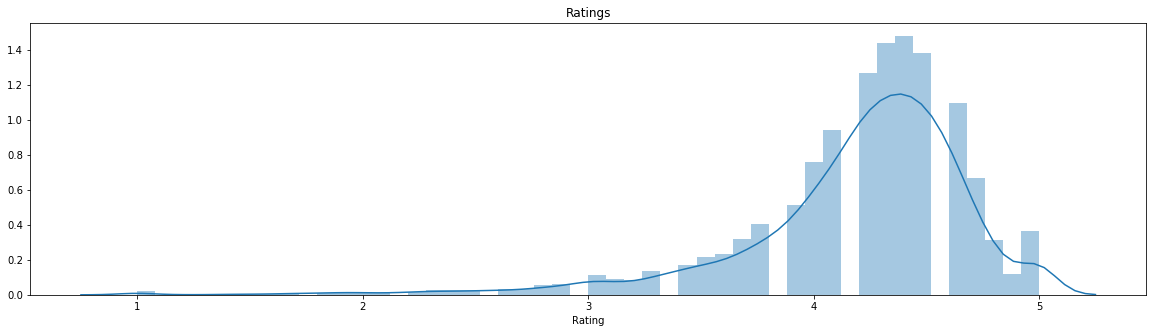

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,5))
sns.distplot(data['Rating']).set(title='Ratings')
plt.show()

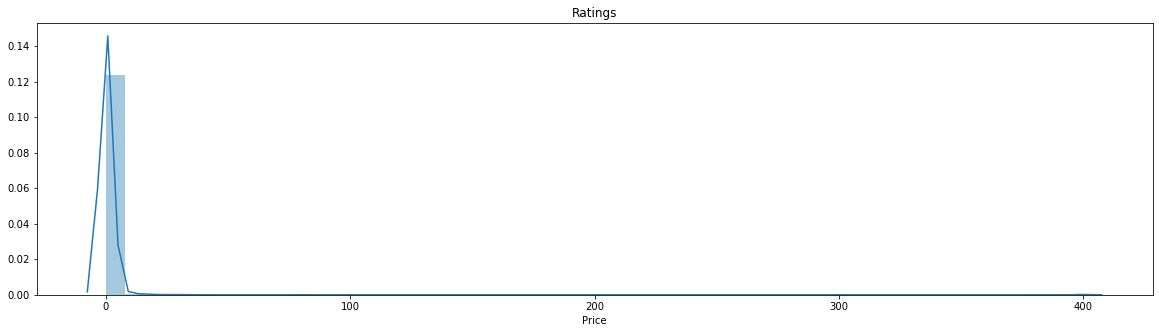

In [74]:
data["Price"] = data["Price"].replace({'\$': ''}, regex=True)
plt.figure(figsize=(20,5))
sns.distplot(data['Price']).set(title='Ratings')
plt.show()

# Kolumna "Size"
Mimo, że ta kolumna może mieć znaczenie przy opracowwaniu danych ta kolumna zostanie pominięta ze względu na występującą w niej wartość "Varies with device", którą byłoby ciążko opracować. Ponadto nie można po prostu usunąć wszystkich jej wystąpień, ponieważ występują ona w ponad 1500 rzędach.

In [62]:
print(data["Size"].unique())

['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '5.5M' '17M' '39M' '31M' '4.2M' '23M' '6.0M' '6.1M'
 '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device' '9.4M' '15M' '10M'
 '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M' '201k' '3.6M' '5.7M'
 '8.6M' '2.4M' '27M' '2.7M' '2.5M' '7.0M' '16M' '3.4M' '8.9M' '3.9M'
 '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M' '9.0M'
 '6.7M' '30M' '2.6M' '7.1M' '22M' '6.4M' '3.2M' '8.2M' '4.9M' '9.5M'
 '5.0M' '5.9M' '13M' '73M' '6.8M' '3.5M' '4.0M' '2.3M' '2.1M' '42M' '9.1M'
 '55M' '23k' '7.3M' '6.5M' '1.5M' '7.5M' '51M' '41M' '48M' '8.5M' '46M'
 '8.3M' '4.3M' '4.7M' '3.3M' '40M' '7.8M' '8.8M' '6.6M' '5.1M' '61M' '66M'
 '79k' '8.4M' '3.7M' '118k' '44M' '695k' '1.6M' '6.2M' '53M' '1.4M' '3.0M'
 '7.2M' '5.8M' '3.8M' '9.6M' '45M' '63M' '49M' '77M' '4.4M' '70M' '9.3M'
 '8.1M' '36M' '6.9M' '7.4M' '84M' '97M' '2.0M' '1.9M' '1.8M' '5.3M' '47M'
 '556k' '526k' '76M' '7.6M' '59M' '9.7M' '78M' '72M' '4

In [63]:
data[data.Size == 'Varies with device'].shape[0]

1637

In [64]:
data = data.drop(columns=["Size", "Android Ver", "Current Ver", "Last Updated"])

In [65]:
to_lowercase = ['App', 'Category', 'Type', 'Content Rating', 'Genres']
for column in to_lowercase:
    data[column] = data[column].apply(str.lower)

In [71]:
data["Installs"] = data["Installs"].replace({'\+': ''}, regex=True)
data["Installs"] = data["Installs"].replace({',': ''}, regex=True)
data

App             Category  \
0        photo editor & candy camera & grid & scrapbook       art_and_design   
1                                   coloring book moana       art_and_design   
2     u launcher lite – free live cool themes, hide ...       art_and_design   
3                                 sketch - draw & paint       art_and_design   
4                 pixel draw - number art coloring book       art_and_design   
...                                                 ...                  ...   
9355                                      fr calculator               family   
9356                                   sya9a maroc - fr               family   
9357                   fr. mike schmitz audio teachings               family   
9358                      the scp foundation db fr nn5n  books_and_reference   
9359      ihoroscope - 2018 daily horoscope & astrology            lifestyle   

      Rating       Reviews  Installs  Type Price Content Rating  \
0        4.1  2.021538e-06     10000  free     0       everyone   
1        3.9  1.235953e-05    500000  free     0       everyone   
2        4.7  1.119638e-03   5000000  free     0       everyone   
3        4.5  2.759054e-03  50000000  free     0           teen   
4        4.3  1.235953e-05    100000  free     0       everyone   
...      ...           ...       ...   ...   ...            ...   
9355     4.0  7.676727e-08       500  free     0       everyone   
9356     4.5  4.733982e-07      5000  free     0       everyone   
9357     5.0  3.838364e-08       100  free     0       everyone   
9358     4.5  1.445784e-06      1000  free     0     mature 17+   
9359     4.5  5.096144e-03  10000000  free     0       everyone   

                         Genres  
0                  art & design  
1     art & design;pretend play  
2                  art & design  
3                  art & design  
4       art & design;creativity  
...                         ...  
9355                  education  
9356                  education  
9357                  education  
9358          books & reference  
9359                  lifestyle  

[9360 rows x 9 columns]

In [72]:
data["Reviews"] = pd.to_numeric(data["Reviews"], errors='coerce')
max_value = data["Reviews"].max()
min_value = data["Reviews"].min()
data["Reviews"] = (data["Reviews"] - min_value) / (max_value - min_value)

data["Installs"] = pd.to_numeric(data["Installs"], errors='coerce')
max_value = data["Installs"].max()
min_value = data["Installs"].min()
data["Installs"] = (data["Installs"] - min_value) / (max_value - min_value)
data

App             Category  \
0        photo editor & candy camera & grid & scrapbook       art_and_design   
1                                   coloring book moana       art_and_design   
2     u launcher lite – free live cool themes, hide ...       art_and_design   
3                                 sketch - draw & paint       art_and_design   
4                 pixel draw - number art coloring book       art_and_design   
...                                                 ...                  ...   
9355                                      fr calculator               family   
9356                                   sya9a maroc - fr               family   
9357                   fr. mike schmitz audio teachings               family   
9358                      the scp foundation db fr nn5n  books_and_reference   
9359      ihoroscope - 2018 daily horoscope & astrology            lifestyle   

      Rating       Reviews      Installs  Type Price Content Rating  \
0        4.1  2.021538e-06  9.999000e-06  free     0       everyone   
1        3.9  1.235953e-05  4.999990e-04  free     0       everyone   
2        4.7  1.119638e-03  4.999999e-03  free     0       everyone   
3        4.5  2.759054e-03  5.000000e-02  free     0           teen   
4        4.3  1.235953e-05  9.999900e-05  free     0       everyone   
...      ...           ...           ...   ...   ...            ...   
9355     4.0  7.676727e-08  4.990000e-07  free     0       everyone   
9356     4.5  4.733982e-07  4.999000e-06  free     0       everyone   
9357     5.0  3.838364e-08  9.900000e-08  free     0       everyone   
9358     4.5  1.445784e-06  9.990000e-07  free     0     mature 17+   
9359     4.5  5.096144e-03  9.999999e-03  free     0       everyone   

                         Genres  
0                  art & design  
1     art & design;pretend play  
2                  art & design  
3                  art & design  
4       art & design;creativity  
...                         ...  
9355                  education  
9356                  education  
9357                  education  
9358          books & reference  
9359                  lifestyle  

[9360 rows x 9 columns]

In [75]:
data.describe(include='all')

App Category       Rating      Reviews     Installs  Type Price  \
count     9360     9360  9360.000000  9360.000000  9360.000000  9360  9360   
unique    8174       33          NaN          NaN          NaN     2    73   
top     roblox   family          NaN          NaN          NaN  free     0   
freq         9     1746          NaN          NaN          NaN  8715  8715   
mean       NaN      NaN     4.191838     0.006581     0.017909   NaN   NaN   
std        NaN      NaN     0.515263     0.040239     0.091266   NaN   NaN   
min        NaN      NaN     1.000000     0.000000     0.000000   NaN   NaN   
25%        NaN      NaN     4.000000     0.000002     0.000010   NaN   NaN   
50%        NaN      NaN     4.300000     0.000076     0.000500   NaN   NaN   
75%        NaN      NaN     4.500000     0.001044     0.005000   NaN   NaN   
max        NaN      NaN     5.000000     1.000000     1.000000   NaN   NaN   

       Content Rating Genres  
count            9360   9360  
unique              6    115  
top          everyone  tools  
freq             7414    732  
mean              NaN    NaN  
std               NaN    NaN  
min               NaN    NaN  
25%               NaN    NaN  
50%               NaN    NaN  
75%               NaN    NaN  
max               NaN    NaN

## Splitting into test, train, validation sets

In [68]:
import numpy as np

np.random.seed(123)
train, validate, test = np.split(data.sample(frac=1, random_state=42), [int(.6*len(data)), int(.8*len(data))])
print(f"Data shape: {data.shape}\nTrain shape: {train.shape}\nTest shape: {test.shape}\nValidation shape:{validate.shape}")

Data shape: (9360, 9)
Train shape: (5616, 9)
Test shape: (1872, 9)
Validation shape:(1872, 9)
